In [1]:
import numpy as np
import pandas as pd

import os
dir_black = os.path.join('../input/soil-types/Soil types/Black Soil')
dir_Cinder = os.path.join('../input/soil-types/Soil types/Cinder Soil')
dir_Laterite = os.path.join('../input/soil-types/Soil types/Laterite Soil')
dir_peat = os.path.join('../input/soil-types/Soil types/Peat Soil')
dir_yellow = os.path.join('../input/soil-types/Soil types/Yellow Soil')


This is folder based data or directory based and thus the images are in folders that are again in main folder. This creates a problem of accessing the image data which aren't augmented.<br>
The Keras has ImageDataGenerator class which generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches). Basically, it can be used to augment image data with a lot of built-in pre-processing.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In this, the flow_from_directory method automatically scans through all the sub-directories and sources the images along with their appropriate labels.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '../input/soil-types/Soil types/',
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 156 images belonging to 5 classes.


In [5]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [6]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [7]:
model = tf.keras.models.Sequential([

    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        3

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [10]:
total_sample = train_generator.n
n_epochs = 30

In [11]:
history = model.fit(
        train_generator,
        steps_per_epoch = int(total_sample/batch_size),
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
15/15 [==============================] - 7s 416ms/step - loss: 1.6270 - acc: 0.2252
Epoch 2/30
15/15 [==============================] - 5s 356ms/step - loss: 1.3233 - acc: 0.3185
Epoch 3/30
15/15 [==============================] - 6s 427ms/step - loss: 1.1520 - acc: 0.4615
Epoch 4/30
15/15 [==============================] - 6s 364ms/step - loss: 1.0518 - acc: 0.4545
Epoch 5/30
15/15 [==============================] - 6s 373ms/step - loss: 1.1998 - acc: 0.4664
Epoch 6/30
15/15 [==============================] - 6s 386ms/step - loss: 1.0076 - acc: 0.4058
Epoch 7/30
15/15 [==============================] - 6s 408ms/step - loss: 1.0095 - acc: 0.5608
Epoch 8/30
15/15 [==============================] - 6s 374ms/step - loss: 0.9129 - acc: 0.5511
Epoch 9/30
15/15 [==============================] - 6s 381ms/step - loss: 0.9322 - acc: 0.5741
Epoch 10/30
15/15 [==============================] - 6s 381ms/step - loss: 0.8744 - acc: 0.5747
Epoch 11/30
15/15 [==============================

In [20]:
import matplotlib.pyplot as plt

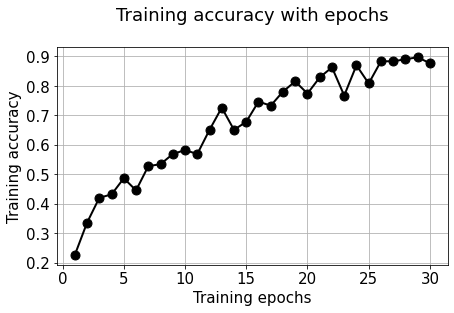

In [21]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [22]:
model.save('my_model.h5')